##### Install prerequisite modules

In [ ]:
!pip install statsmodels --upgrade

##### Mount Google Drive 

__NOTE__: I uploaded cryptocurrency files from blackboard assignment section to my google drive: "__MyDrive/Colab Notebooks/week-2/data__"

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/Colab Notebooks/week-2/data"

archive.zip		coin_Dogecoin.csv  coin_Solana.csv
coin_Aave.csv		coin_EOS.csv	   coin_Stellar.csv
coin_BinanceCoin.csv	coin_Ethereum.csv  coin_Tether.csv
coin_Bitcoin.csv	coin_Iota.csv	   coin_Tron.csv
coin_Cardano.csv	coin_Litecoin.csv  coin_Uniswap.csv
coin_ChainLink.csv	coin_Monero.csv    coin_USDCoin.csv
coin_Cosmos.csv		coin_NEM.csv	   coin_WrappedBitcoin.csv
coin_CryptocomCoin.csv	coin_Polkadot.csv  coin_XRP.csv


##### Read Bitcoin pricing information

In [ ]:
import pandas as pd

In [ ]:
bitcoin = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/week-2/data/coin_Bitcoin.csv")

In [ ]:
bitcoin

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


In [ ]:
# bitcoin = bitcoin[-365:]

##### Ensure data is regression ready 

In [ ]:
import plotly.express as px

In [ ]:
fig = px.bar(bitcoin[-365:], x="Date", y="Close", color="Marketcap")
fig.update_layout({"plot_bgcolor": "white"})
fig.show()

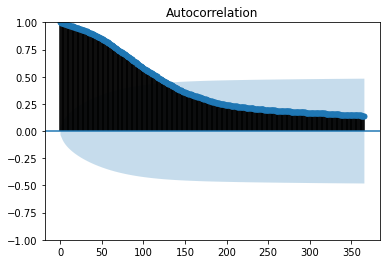

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
time_series = bitcoin["Close"]
x = plot_acf(time_series, lags=365)

In [ ]:
# What happens if you use more than 365 days? Is your prediction going to be better? Or worse?
train = bitcoin["Close"][-365:-60].values
test = bitcoin["Close"][-60:].values



##### Train the model

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as pyplot

##### [__MANUAL CALC__] Predict the future using "slope" and "coefficient"

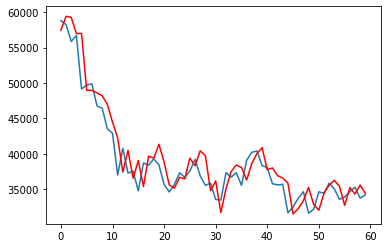

In [ ]:
window = 30
model = AutoReg(train, lags=window, old_names=False)
model_fit = model.fit()
# print(model_fit.summary())
coef = model_fit.params
import matplotlib.pyplot as pyplot
coef = model_fit.params
history = train[len(train) - window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	# print("observed: ", obs, ", predict: ", yhat)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show(800, 400)

#### [__AUTOMATED CALCULATION__] Predict using native AutoReg function with different parameters

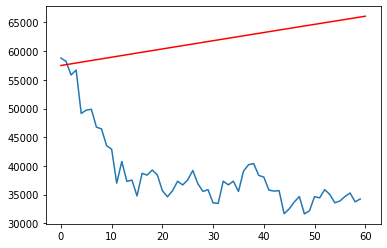

In [ ]:
model = AutoReg(train, lags=1, old_names=False)
model_fit = model.fit()
predictions = model_fit.predict(start=len(train), end=len(train) + len(test))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

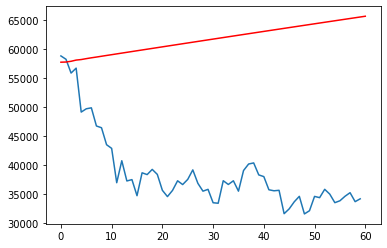

In [ ]:
model = AutoReg(train, lags=7, old_names=False)
model_fit = model.fit()
predictions = model_fit.predict(start=len(train), end=len(train) + len(test))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

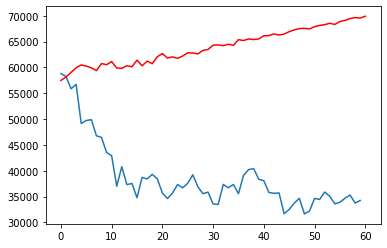

In [ ]:
model = AutoReg(train, lags=30, old_names=False)
model_fit = model.fit()
predictions = model_fit.predict(start=len(train), end=len(train) + len(test))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

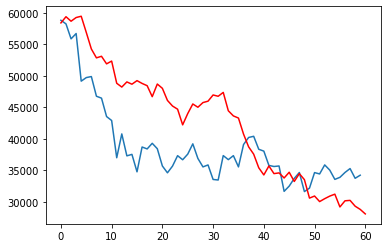

In [ ]:
model = AutoReg(train, lags=60, old_names=False)
model_fit = model.fit()
predictions = model_fit.predict(start=len(train), end=len(train) + len(test))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

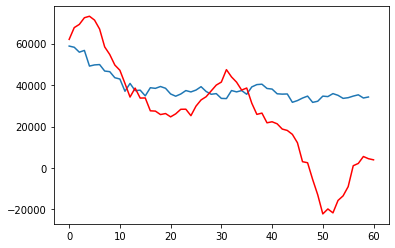

In [ ]:
model = AutoReg(train, lags=90, old_names=False)
model_fit = model.fit()
predictions = model_fit.predict(start=len(train), end=len(train) + len(test))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

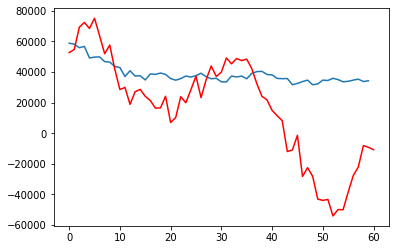

In [ ]:
model = AutoReg(train, lags=120, old_names=False)
model_fit = model.fit()
predictions = model_fit.predict(start=len(train), end=len(train) + len(test))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

#### Things to ponder
1. Why are the autoreg models performing differently from manual version?
2. Why is there a difference in prediction of different automatic models?

#### Users willing to do the homework using python

1. You need to run the above analytics for all the crytos
2. Identify the parameter for which your models work the best
3. Short list 3 cryptos out of 20 that can reasonably predict

In [ ]:
# Optimal hyperparameters =  Grid Search CV | Random Search CV

In [ ]:

# 60 
# 40 correctly
# 20 incorrectly

In [ ]:
# 60 => 20 (bad) = 40 (good)
# 